<a href="https://colab.research.google.com/github/akashganesan1/Boston-city-score_analysis/blob/main/Stats_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from dataclasses import dataclass
import sklearn
from scipy.stats import norm

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving in-vehicle-coupon-recommendation.csv to in-vehicle-coupon-recommendation (3).csv


In [ ]:
#Reading the original dataset
raw_data = pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')

In [ ]:
#Number of records
raw_data.shape

(12684, 26)

In [ ]:
#Checking a sample of data
raw_data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
#Checking the information about the features
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
#Checking for null values
(raw_data.isna().sum() / len(raw_data)) * 100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

##### **Inference**:

*   Column "**car**" has 99% null values. Imputing values to this column which is majorly null can impact the prediction with changes which might not reflect the reality. So, we can drop the column.
*   Other columns like **Bar**, **CoffeeHouse**, **CarryAway**, **RestaurantLessThan20**, and **Restaurant20To50** have around 1% of null values which can be imputed with values depending on the type and nature of the column.



In [ ]:
#Checking for empty or Nan values
raw_data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [ ]:
#Checking for duplicates
raw_data.duplicated().sum()

74

In [ ]:
#Displaying the duplicate rows
raw_data[raw_data.duplicated()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


Dropping the duplicate rows and dropping the "**car**" column.

In [ ]:
#Dropping duplicates
raw_data = raw_data.drop_duplicates()
len(raw_data)

12610

In [ ]:
#Dropping columns with higher missing values
raw_data = raw_data.dropna(axis=1, thresh=0.2*len(raw_data))

###Data Imputation :

We have observed that for the columns which have null values, the missing percentage is less than 5%. Data imputation can be done for columns using Mode or Most frequent category imputation because they are categorical columns.

In [ ]:
#Data Imputation
raw_data = raw_data.fillna(raw_data.mode().iloc[0])

In [ ]:
#Verifying the dataset
(raw_data.isna().sum() / len(raw_data)) * 100

destination             0.0
passanger               0.0
weather                 0.0
temperature             0.0
time                    0.0
coupon                  0.0
expiration              0.0
gender                  0.0
age                     0.0
maritalStatus           0.0
has_children            0.0
education               0.0
occupation              0.0
income                  0.0
Bar                     0.0
CoffeeHouse             0.0
CarryAway               0.0
RestaurantLessThan20    0.0
Restaurant20To50        0.0
toCoupon_GEQ5min        0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ25min       0.0
direction_same          0.0
direction_opp           0.0
Y                       0.0
dtype: float64

In [ ]:
for col in raw_data:
    print(col,":",raw_data[col].value_counts())

destination : destination
No Urgent Place    6266
Home               3230
Work               3114
Name: count, dtype: int64
passanger : passanger
Alone        7248
Friend(s)    3292
Partner      1069
Kid(s)       1001
Name: count, dtype: int64
weather : weather
Sunny    10011
Snowy     1397
Rainy     1202
Name: count, dtype: int64
temperature : temperature
80    6475
55    3830
30    2305
Name: count, dtype: int64
time : time
6PM     3220
7AM     3114
10AM    2271
2PM     2006
10PM    1999
Name: count, dtype: int64
coupon : coupon
Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: count, dtype: int64
expiration : expiration
1d    7031
2h    5579
Name: count, dtype: int64
gender : gender
Female    6469
Male      6141
Name: count, dtype: int64
age : age
21         2642
26         2548
31         2019
50plus     1781
36         1317
41         1089
46          670
below21     544
Name:

## Exploratory Data Analysis:

In [ ]:
#Univariate Analysis


In [ ]:
# Print the column names of the DataFrame
print(raw_data.columns)


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


TypeError: is_categorical() takes 1 positional argument but 2 were given

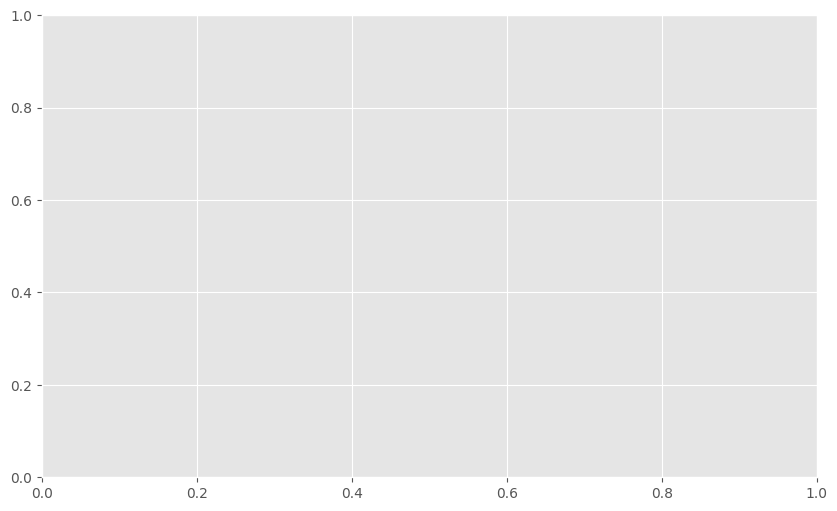

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')

color_palette = ["#0F7AC0", "#09BA17"]


# Assuming 'raw_data' is your DataFrame and includes a 'Y' column and other categorical columns.

# Pivot data for stacked bar chart
def pivot_data_for_stacked_bar(data, column, stack_by):
    # Count the occurrences of each category within 'Y' for the specified column
    pivoted_data = data.groupby([column, stack_by]).size().unstack(fill_value=0)
    return pivoted_data

# Function to add text inside the bars
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        # Get the rectangle properties
        width = rect.get_width()
        height = rect.get_height()
        x = rect.get_x()
        y = rect.get_y()

        # The width of the bar is the data value and is used to place the text label
        label_text = f'{width:.0f}'  # Format the number
        label_x = x + width - (spacing if width > spacing else 0)  # Adjust the x-position based on the width
        label_y = y + height / 2  # Center the text vertically in the bar

        if width > spacing:  # Only add text if the bar is wide enough
            ax.text(label_x, label_y, label_text, ha='right', va='center', color='white', weight='bold')

# Plotting function for horizontal stacked bar charts with values in bars
def plot_stacked_barh_with_values(data, column, ax, palette=None):
    pivoted_data = pivot_data_for_stacked_bar(data, column, 'Y')
    bars = pivoted_data.plot(kind='barh', stacked=True, ax=ax, color=palette, legend=True)
    ax.legend(title='Y', bbox_to_anchor=(1.05, 1), loc='upper left')
    add_value_labels(ax)  # Call the function to add labels

# Iterate through each column in the DataFrame
for column in raw_data.columns[:-1]:  # Excluding 'Y' from the iteration
    plt.figure(figsize=(10, 6))  # Set figure size
    ax = plt.gca()  # Get current axes

    if is_categorical(column, raw_data):
        # Plot horizontal stacked bar chart for categorical columns (excluding 'Y')
        plot_stacked_barh_with_values(raw_data, column, ax, palette=["#0F7AC0", "#09BA17"])
  # Customize colors as needed
        plt.title(f'Stacked Bar Chart for {column} by Y')
    else:
        # Skip plotting for continuous variables in this example
        continue

    plt.xlabel('Count')  # Adjust since we're swapping axes
    plt.ylabel(column)  # Now the y-axis label represents what was previously on the x-axis
    plt.tight_layout()  # Adjust layout
    plt.show()


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null  obj

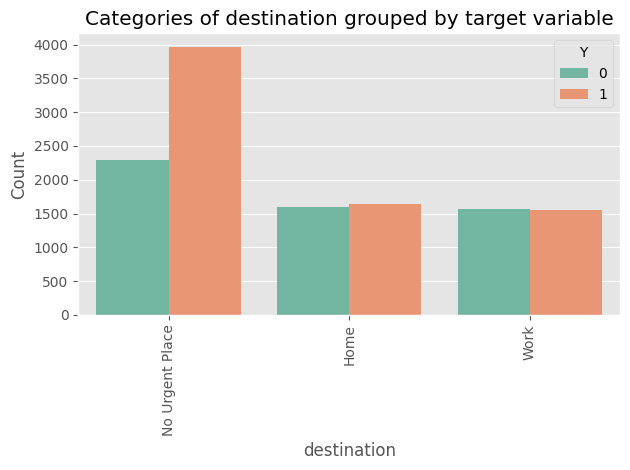

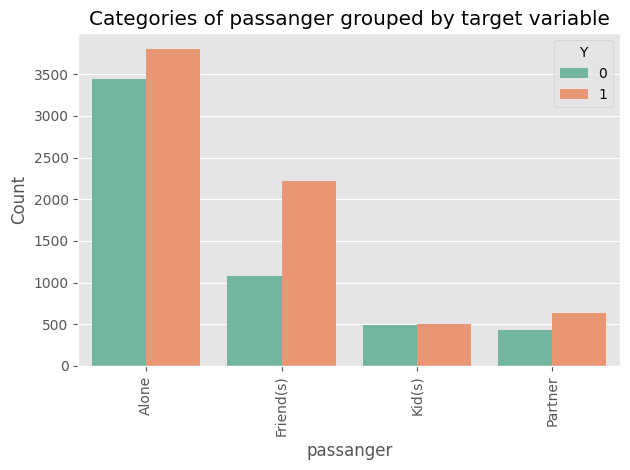

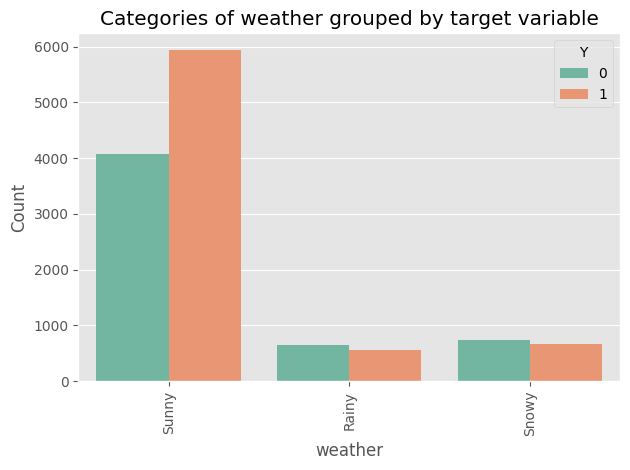

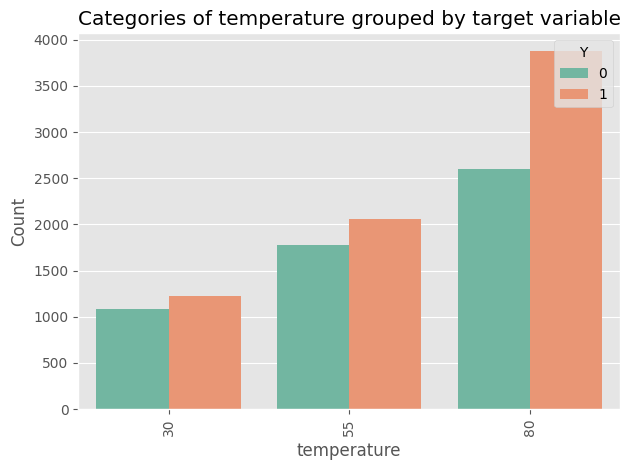

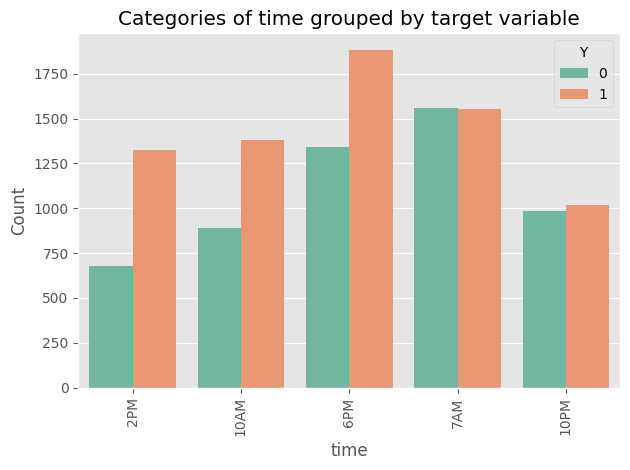

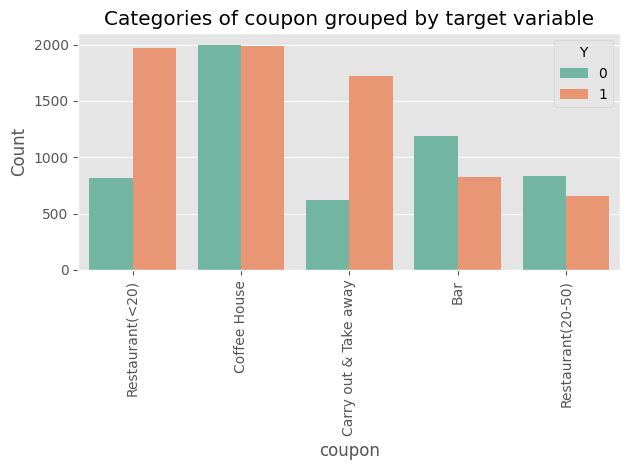

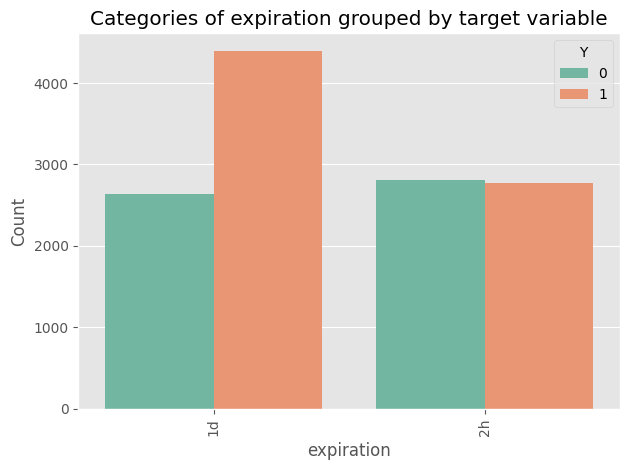

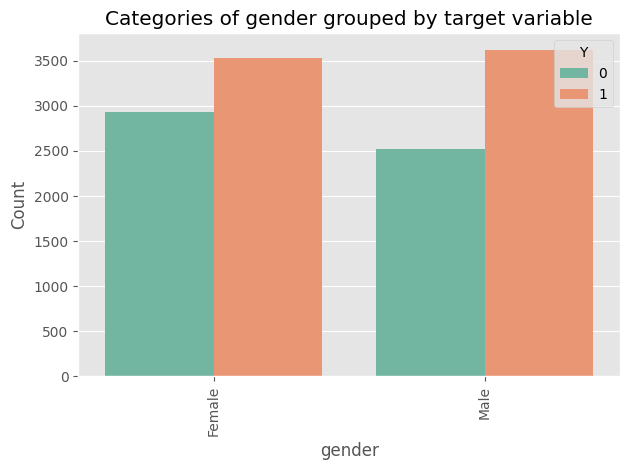

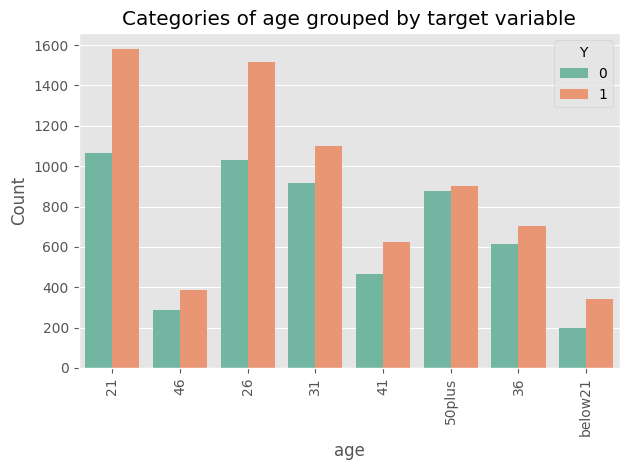

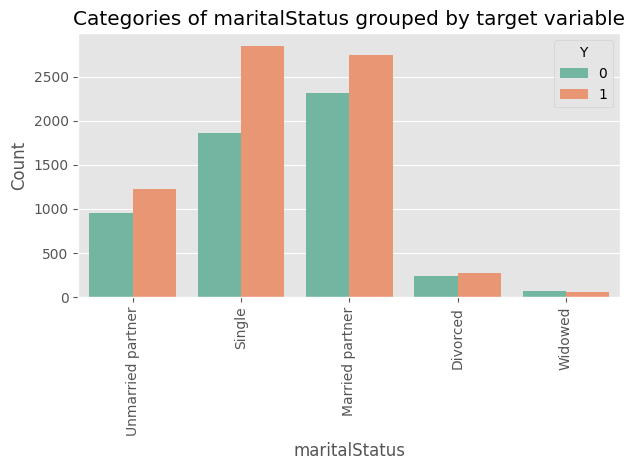

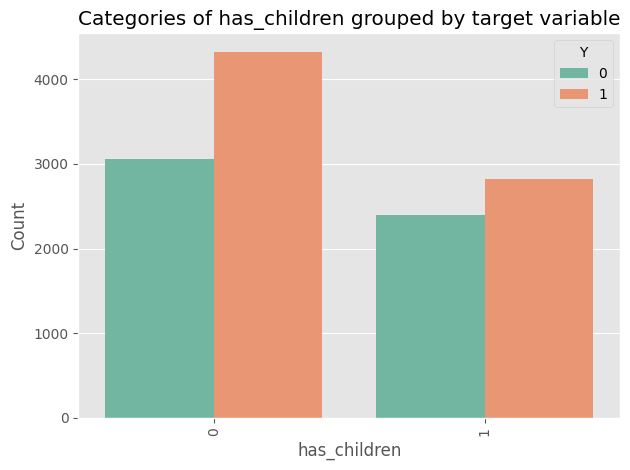

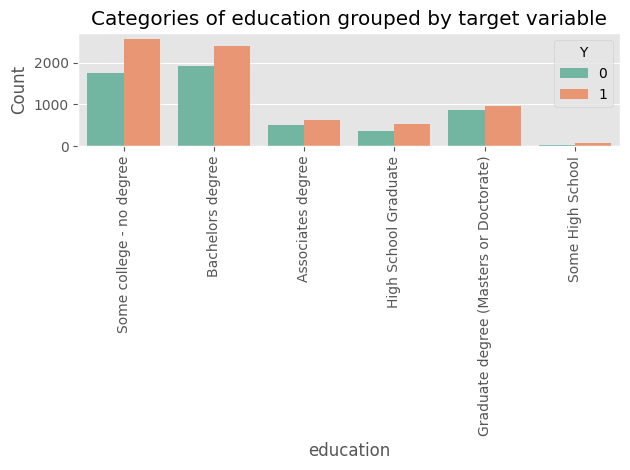

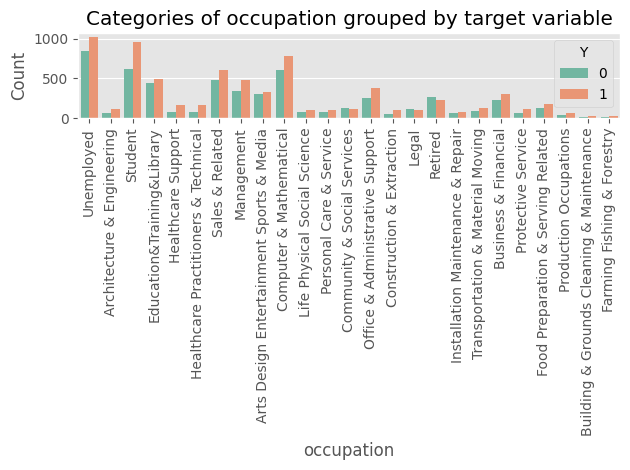

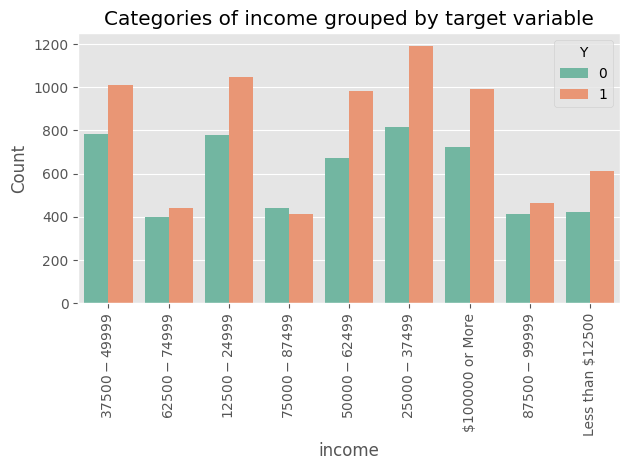

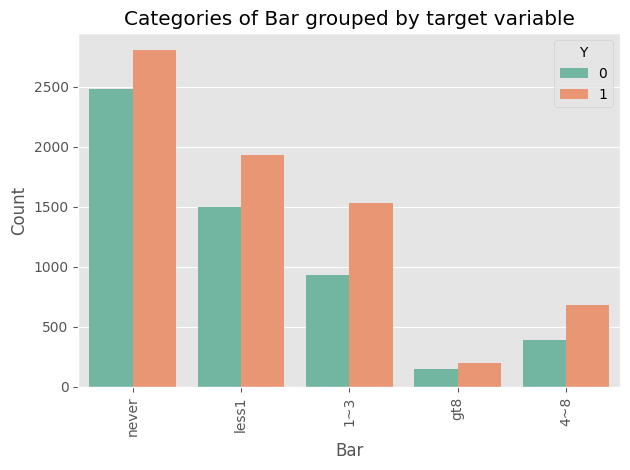

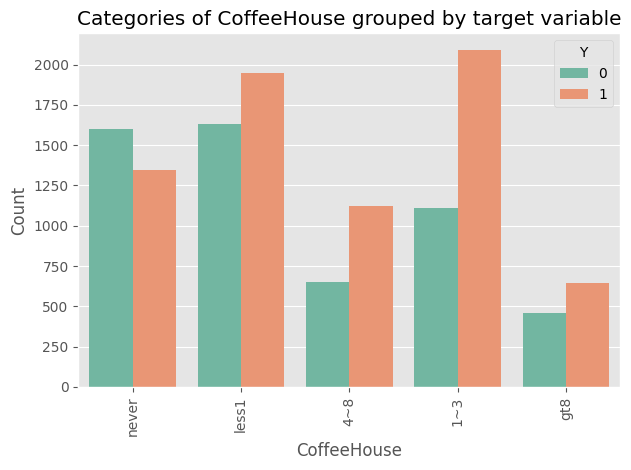

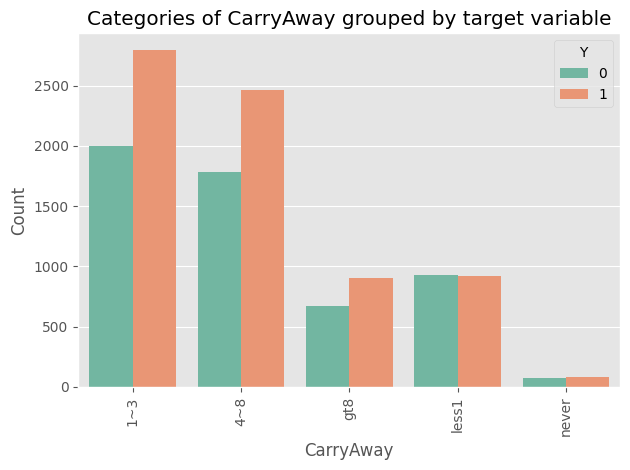

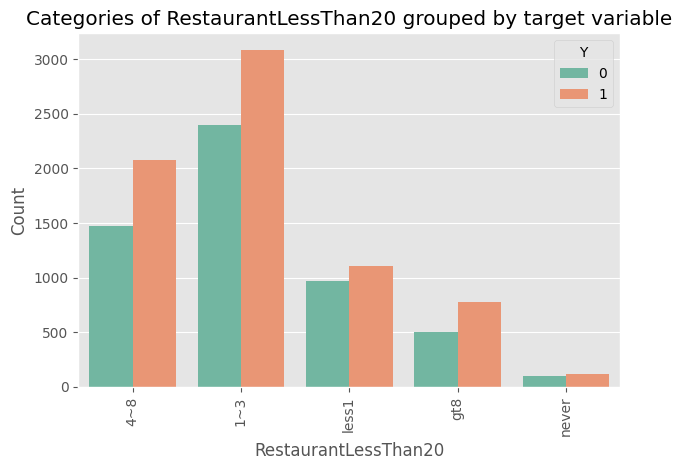

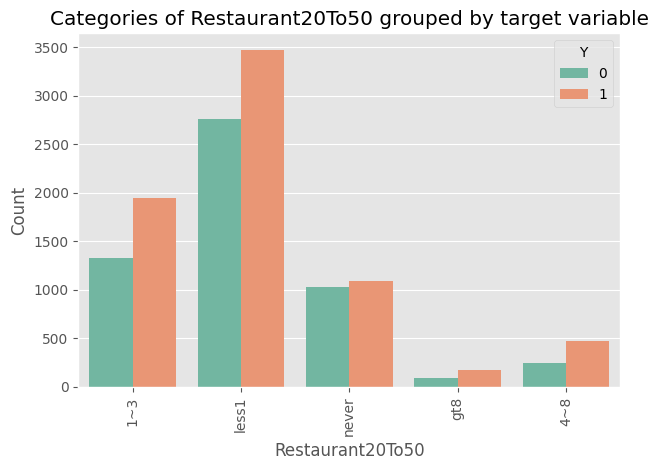

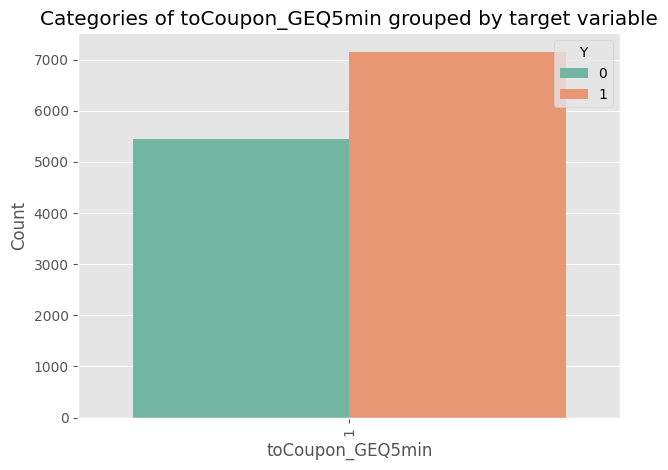

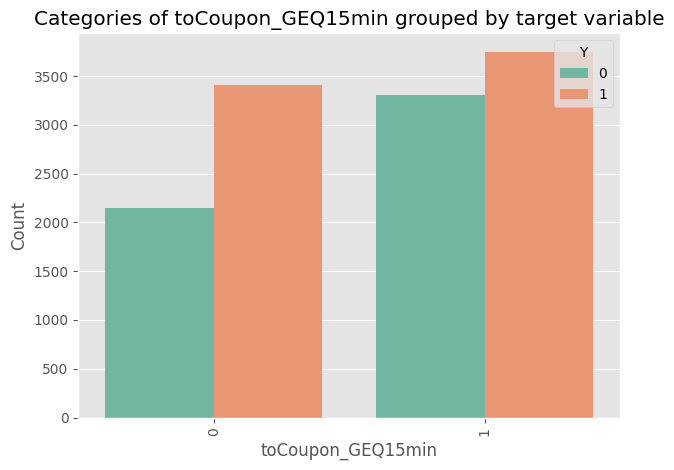

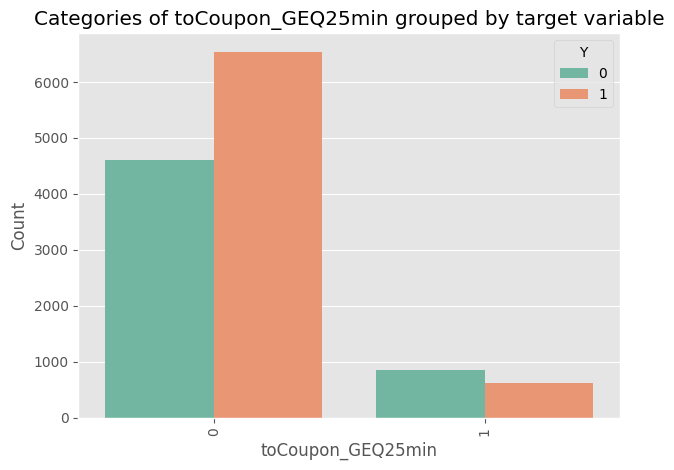

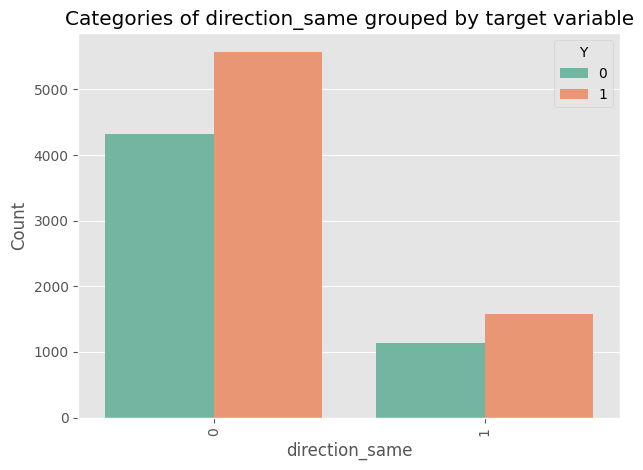

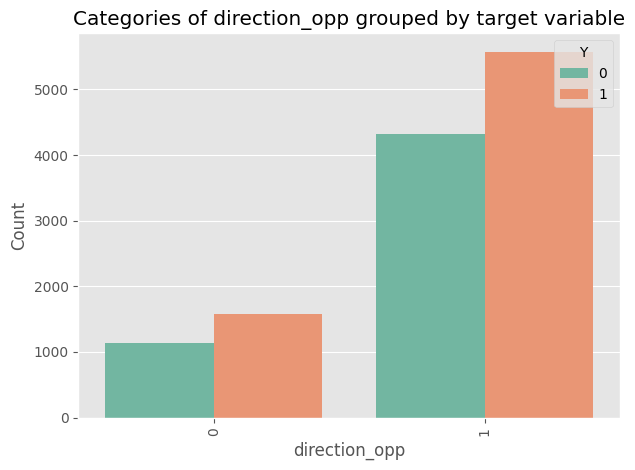

In [ ]:
#Frequency distribution of each feature with respect to target
import matplotlib.pyplot as plt
for col in raw_data:
  if col!='Y':
    sns.countplot(data=raw_data, x=col, hue='Y', palette='Set2')
    plt.title(f'Categories of {col} grouped by target variable')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Y', loc='upper right')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

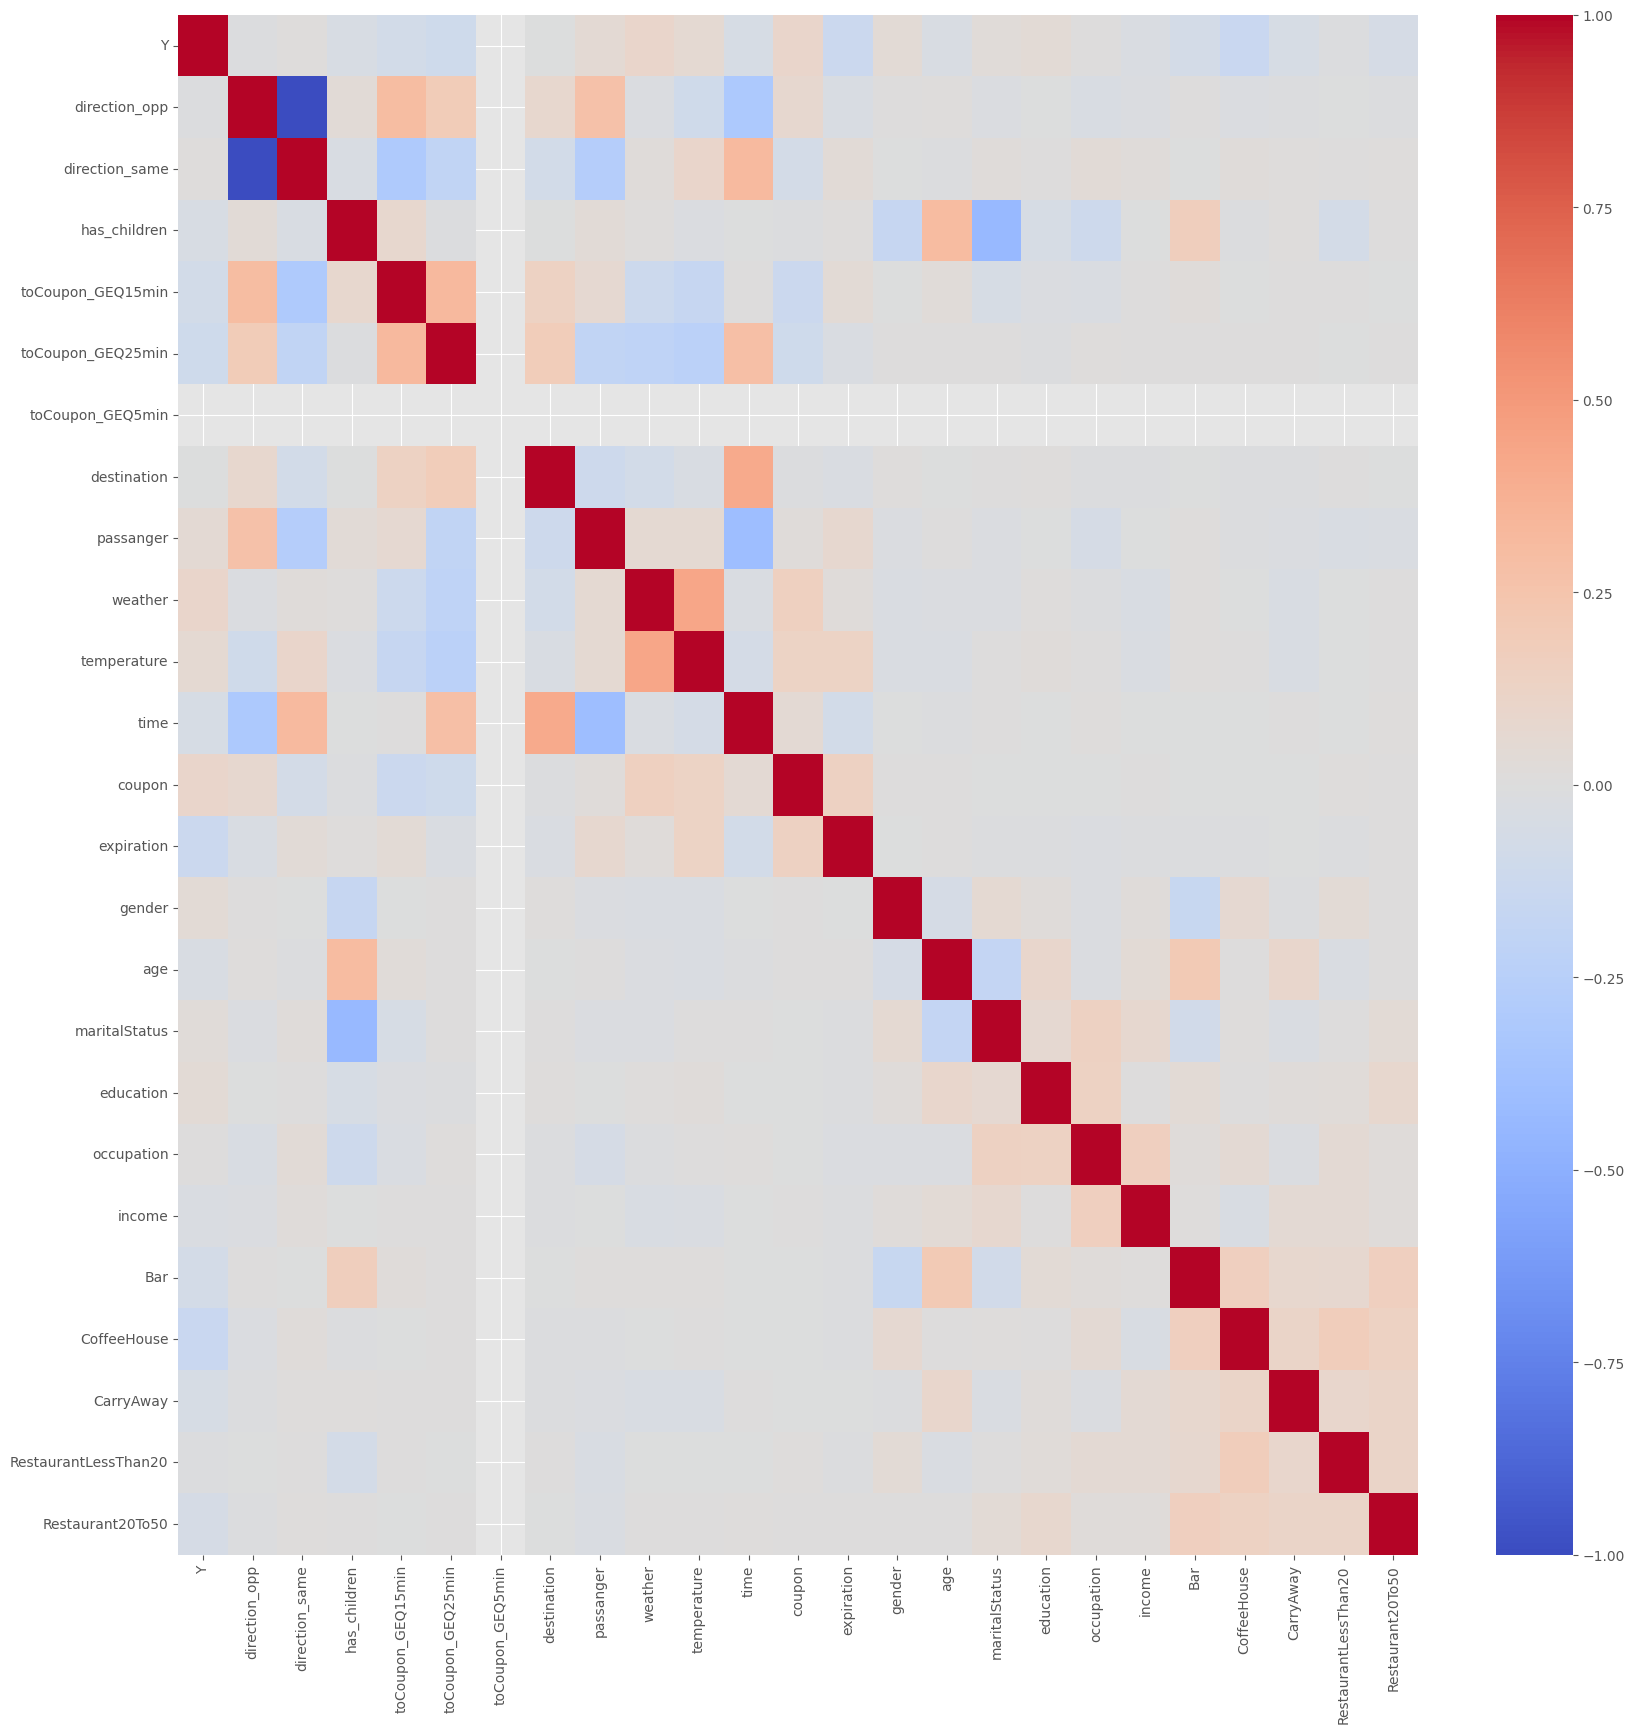

In [ ]:

import pandas as pd

# Assuming 'raw_data' is your DataFrame
# Convert specific columns with numeric ranges or values represented as strings
def convert_range_to_average(column_value):
    if '~' in column_value:
        low, high = column_value.split('~')
        return (float(low) + float(high)) / 2
    else:
        return float(column_value)

# Assuming 'corr' is your correlation matrix
plt.figure(figsize=(20, 20))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.show()


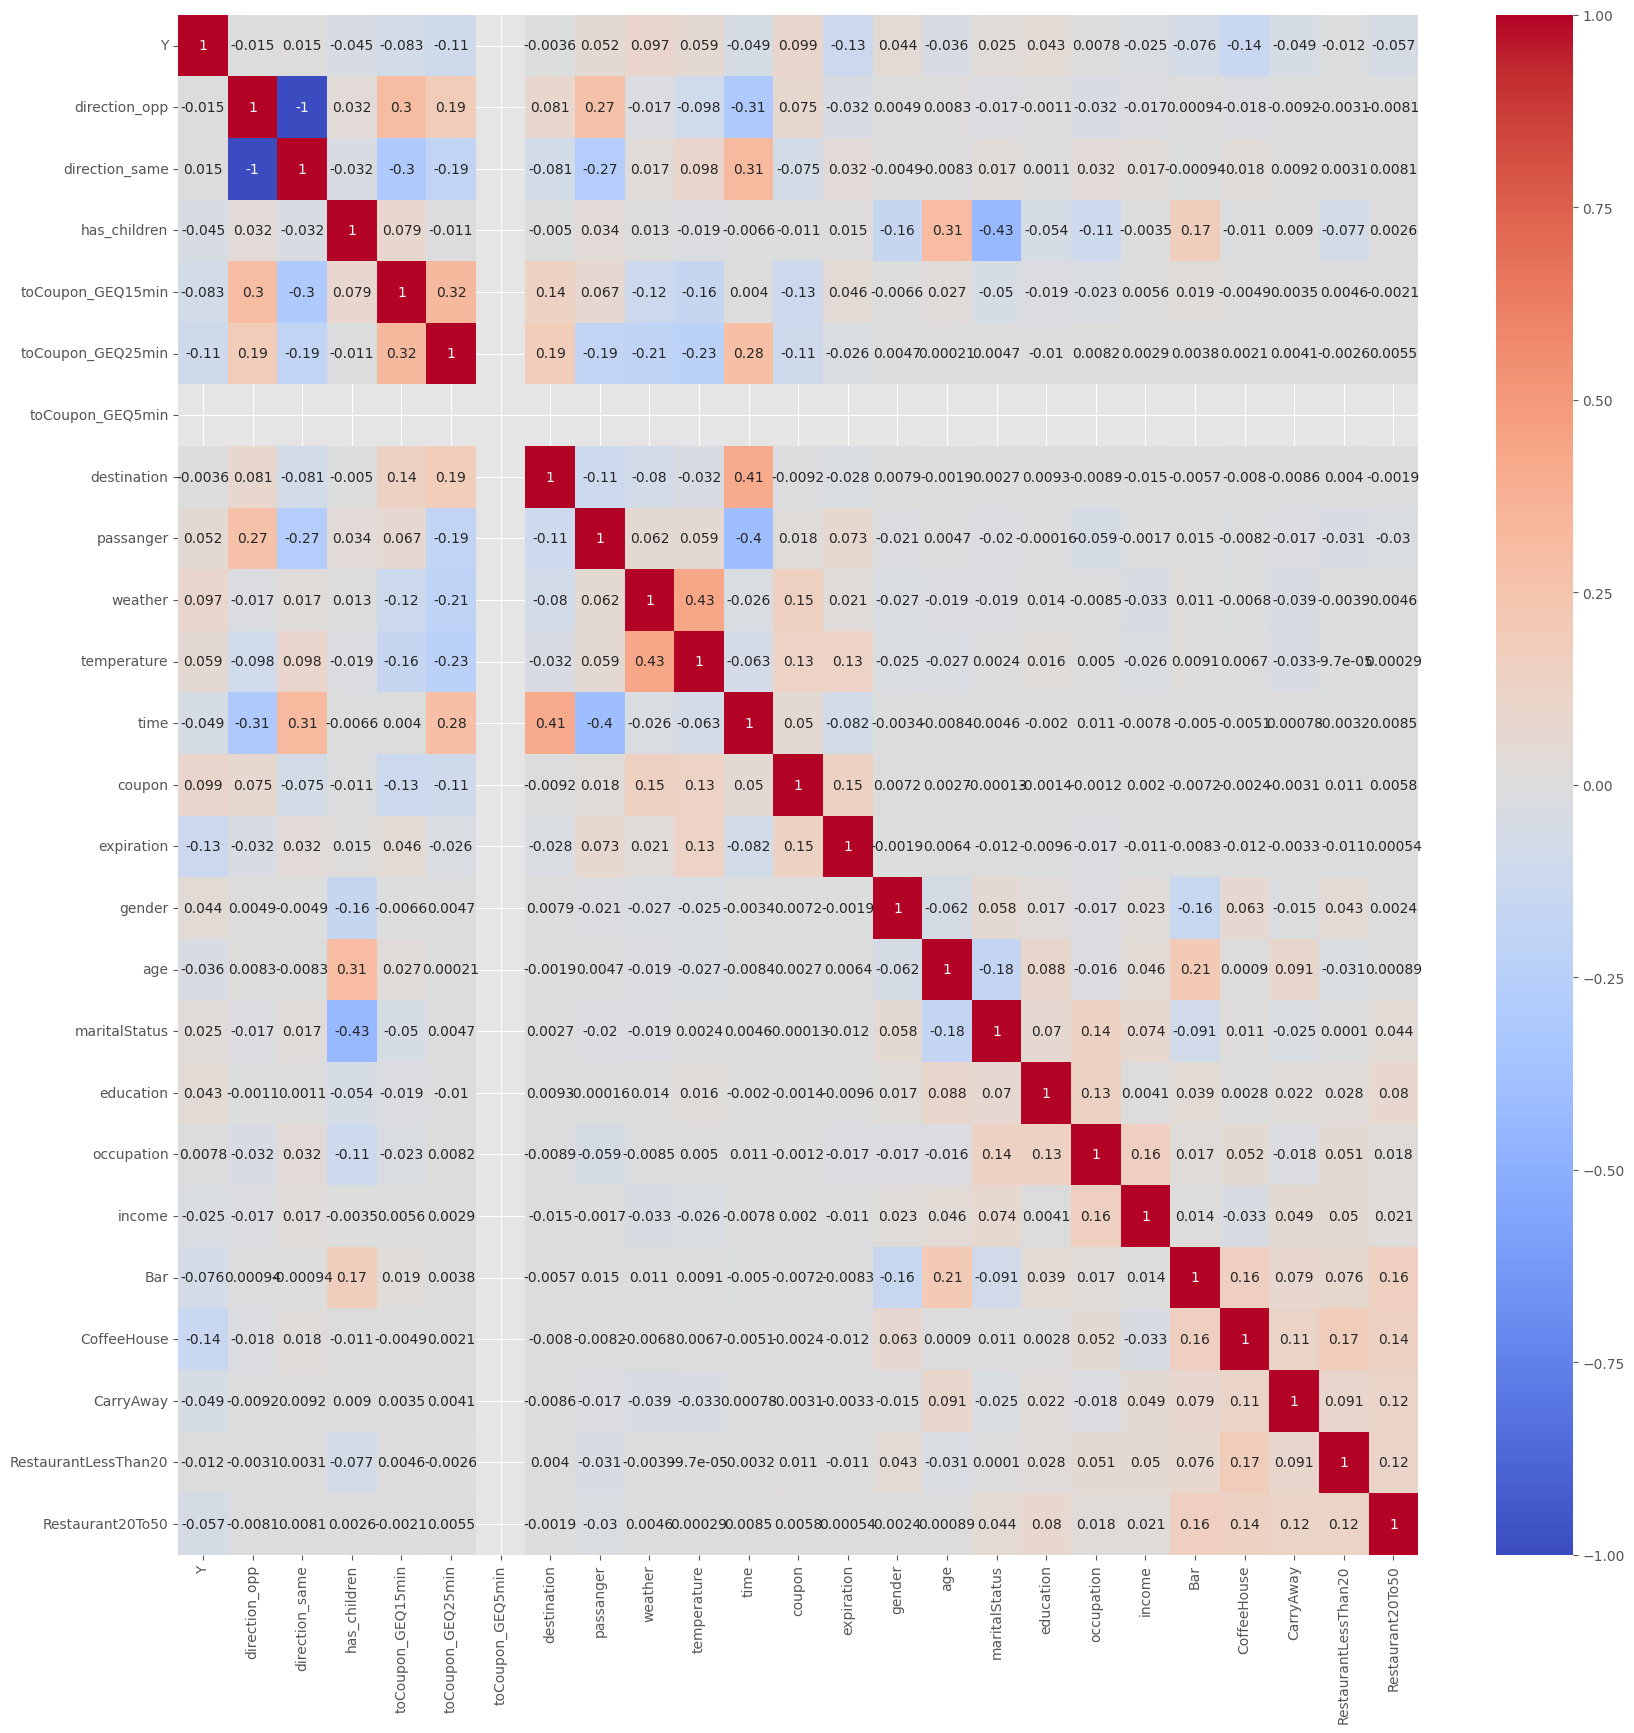

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'raw_data' is your DataFrame
# Function to convert specific columns with numeric ranges or values represented as strings
def convert_range_to_average(column_value):
    if '~' in column_value:
        low, high = column_value.split('~')
        return (float(low) + float(high)) / 2
    else:
        return float(column_value)

# Example usage of the function to convert a column
# raw_data['your_column'] = raw_data['your_column'].apply(convert_range_to_average)

# Assuming 'corr_matrix' is your correlation matrix
plt.figure(figsize=(20, 20))  # Adjust the size as needed
# Setting annot=True to add numeric values inside the heatmap cells
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()


In [ ]:
raw_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'df' is your DataFrame
# Example DataFrame creation
# df = pd.DataFrame({
#     'destination': np.random.choice(['Home', 'Work'], size=100),
#     'age': np.random.randint(18, 65, size=100),
#     'income': np.random.choice(['Low', 'Medium', 'High'], size=100),
#     'temperature': np.random.normal(30, 5, size=100),
# })

# Determine the column type
def is_categorical(column):
    return raw_data[column].dtype.name == 'object' or len(raw_data[column].unique()) < 10

# Iterate through each column in the DataFrame
for column in raw_data.columns:
    plt.figure(figsize=(10, 6))  # Set figure size

    if is_categorical([column]):
        # It's categorical, use seaborn countplot
        sns.countplot(x=raw_data[column])
        plt.title(f'Count Plot for {column}')
    else:
        # It's continuous, use matplotlib hist
        plt.hist(raw_data[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')

    plt.xlabel(column)  # Set the x-axis label
    plt.ylabel('Count')  # Set the y-axis label for both plots uniformly

    plt.show()


AttributeError: 'DataFrame' object has no attribute 'dtype'

<Figure size 1000x600 with 0 Axes>

In [ ]:
#Outlier detection


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null  obj

- One Hot Encoding


In [ ]:
import pandas as pd

# Example DataFrame `df`
# categorical_columns = [...]

# Step 1: Copy non-categorical columns and their data types
non_categorical_columns = raw_data.columns.difference(categorical_columns)
non_categorical_data = raw_data[non_categorical_columns].copy()
non_categorical_dtypes = non_categorical_data.dtypes

# Step 2: Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(raw_data[categorical_columns], drop_first=True, sparse=True)

# Step 3: Merge non-categorical data back
df_final = pd.concat([non_categorical_data, df_encoded], axis=1)

# Step 4: Ensure non-categorical columns retain their original data types
for column in non_categorical_dtypes.index:
    df_final[column] = df_final[column].astype(non_categorical_dtypes[column])


# Assuming `df_final` is the DataFrame after one-hot encoding
for col in df_final.select_dtypes(include=['bool']).columns:
    df_final[col] = df_final[col].astype(int)



In [ ]:
df_final

,Y,direction_opp,direction_same,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,toCoupon_GEQ5min,temperature,destination_No Urgent Place,destination_Work,...,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,1,1,0,1,0,0,1,55,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,80,1,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,0,1,1,0,1,80,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,1,0,1,80,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,1,0,1,80,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,0,1,0,0,0,1,55,0,0,...,0,0,1,0,0,0,0,0,0,0
12680,1,1,0,0,0,0,1,55,0,1,...,0,0,1,0,0,0,0,0,0,0
12681,0,0,1,0,0,0,1,30,0,1,...,0,0,1,0,0,0,0,0,0,0
12682,0,1,0,0,1,1,1,30,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 93 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Y                                                     12610 non-null  int64
 1   direction_opp                                         12610 non-null  int64
 2   direction_same                                        12610 non-null  int64
 3   has_children                                          12610 non-null  int64
 4   toCoupon_GEQ15min                                     12610 non-null  int64
 5   toCoupon_GEQ25min                                     12610 non-null  int64
 6   toCoupon_GEQ5min                                      12610 non-null  int64
 7   temperature                                           12610 non-null  int64
 8   destination_No Urgent Place                           12610 non-null  int64
 9   

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Assuming `raw_data` is your initial DataFrame and `categorical_columns` is a list of the names of the categorical columns

# Step 1: Copy non-categorical columns and their data types
non_categorical_columns = raw_data.columns.difference(categorical_columns)
non_categorical_data = raw_data[non_categorical_columns].copy()
non_categorical_dtypes = non_categorical_data.dtypes

# Step 2: Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the categorical columns
# Note: The encoder expects a 2D input so if you have a single column, you might need to reshape it
encoded_categorical_data = encoder.fit_transform(raw_data[categorical_columns])

# Convert the encoded data into a DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=categorical_columns)

# Since the encoding process might reset the index, let's align the index with the original DataFrame
encoded_categorical_df.index = raw_data.index

# Step 3: Merge non-categorical data back with the newly encoded categorical data
df_final = pd.concat([non_categorical_data, encoded_categorical_df], axis=1)

# Step 4: Ensure non-categorical columns retain their original data types
for column in non_categorical_dtypes.index:
    df_final[column] = df_final[column].astype(non_categorical_dtypes[column])


In [ ]:
df_final

,Y,direction_opp,direction_same,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,toCoupon_GEQ5min,destination,passanger,weather,...,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,1,1,0,1,0,0,1,1.0,0.0,2.0,...,0.0,3.0,5.0,24.0,3.0,4.0,4.0,0.0,1.0,0.0
1,0,1,0,1,0,0,1,1.0,1.0,2.0,...,0.0,3.0,5.0,24.0,3.0,4.0,4.0,0.0,1.0,0.0
2,1,1,0,1,1,0,1,1.0,1.0,2.0,...,0.0,3.0,5.0,24.0,3.0,4.0,4.0,0.0,1.0,0.0
3,0,1,0,1,1,0,1,1.0,1.0,2.0,...,0.0,3.0,5.0,24.0,3.0,4.0,4.0,0.0,1.0,0.0
4,0,1,0,1,1,0,1,1.0,1.0,2.0,...,0.0,3.0,5.0,24.0,3.0,4.0,4.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,0,1,0,0,0,1,0.0,3.0,0.0,...,1.0,2.0,1.0,21.0,6.0,4.0,4.0,0.0,1.0,0.0
12680,1,1,0,0,0,0,1,2.0,0.0,0.0,...,1.0,2.0,1.0,21.0,6.0,4.0,4.0,0.0,1.0,0.0
12681,0,0,1,0,0,0,1,2.0,0.0,1.0,...,1.0,2.0,1.0,21.0,6.0,4.0,4.0,0.0,1.0,0.0
12682,0,1,0,0,1,1,1,2.0,0.0,1.0,...,1.0,2.0,1.0,21.0,6.0,4.0,4.0,0.0,1.0,0.0


In [ ]:
for col in df_final:
    print(col,":",df_final[col].value_counts())

Y : Y
1    7157
0    5453
Name: count, dtype: int64
direction_opp : direction_opp
1    9892
0    2718
Name: count, dtype: int64
direction_same : direction_same
0    9892
1    2718
Name: count, dtype: int64
has_children : has_children
0    7383
1    5227
Name: count, dtype: int64
toCoupon_GEQ15min : toCoupon_GEQ15min
1    7059
0    5551
Name: count, dtype: int64
toCoupon_GEQ25min : toCoupon_GEQ25min
0    11147
1     1463
Name: count, dtype: int64
toCoupon_GEQ5min : toCoupon_GEQ5min
1    12610
Name: count, dtype: int64
destination : destination
1.0    6266
0.0    3230
2.0    3114
Name: count, dtype: int64
passanger : passanger
0.0    7248
1.0    3292
3.0    1069
2.0    1001
Name: count, dtype: int64
weather : weather
2.0    10011
1.0     1397
0.0     1202
Name: count, dtype: int64
temperature : temperature
2.0    6475
1.0    3830
0.0    2305
Name: count, dtype: int64
time : time
3.0    3220
4.0    3114
0.0    2271
2.0    2006
1.0    1999
Name: count, dtype: int64
coupon : coupon
2.0    3